# POLYNOMIAL REGRESSION

To explain polynomial regression for a dataset with two feature instances ($x_1$ and $x_2$), where each feature instance has two data points, let's consider a hypothetical dataset. Unlike linear regression, polynomial regression allows us to model the relationship between the independent variables ($x_1$ and $x_2$) and the dependent variable ($y$) as a polynomial, which can capture more complex relationships.

### Example Dataset:

| Data Point | $x_1$ (Feature 1) | $x_2$ (Feature 2) | $y$ (Target) |
|------------|-------------------|-------------------|--------------|
| 1          | $x_{11}$          | $x_{12}$          | $y_1$        |
| 2          | $x_{21}$          | $x_{22}$          | $y_2$        |

### Polynomial Regression Model:

For illustrative purposes, let's consider a polynomial regression model that includes terms up to the second degree for each feature and an interaction term between $x_1$ and $x_2$. The model can be represented as:

$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 + \theta_5 x_1 x_2$

Where:
- $\hat{y}$is the predicted value of the target variable.
- $\theta_0$ is the intercept term.
- $\theta_1$ and $\theta_2$ are the coefficients for the linear terms of features $x_1$ and $x_2$, respectively.
- $\theta_3$ and $\theta_4$ are the coefficients for the squared terms of features $x_1^2$ and $x_2^2$, respectively, allowing the model to capture non-linear relationships.
- $\theta_5$ is the coefficient for the interaction term $x_1 x_2$, allowing the model to capture the combined effect of $x_1$ and $x_2$ on $y$.

### Objective:

The objective in polynomial regression, similar to linear regression, is to find the values of the coefficients $\theta_0, \theta_1, \theta_2, \theta_3, \theta_4,$and $\theta_5$ that minimize the difference between the predicted values $\hat{y}$and the actual target values $y$ in the dataset. This is typically achieved by minimizing a cost function, such as the Mean Squared Error (MSE), which for our dataset with two data points becomes:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$\
$\text{MSE} = \frac{1}{2} \left[ \text{Residual}_1^2 + \text{Residual}_2^2 \right]$

Where:
- $\text{Residual}_1 = y_1 - (\theta_0 + \theta_1 x_{11} + \theta_2 x_{12} + \theta_3 x_{11}^2 + \theta_4 x_{12}^2 + \theta_5 x_{11} x_{12})$
- $\text{Residual}_2 = y_2 - (\theta_0 + \theta_1 x_{21} + \theta_2 x_{22} + \theta_3 x_{21}^2 + \theta_4 x_{22}^2 + \theta_5 x_{21} x_{22})$

### Solution:

The optimal values of the coefficients can be found using various optimization methods, such as Gradient Descent, since the presence of higher-degree terms and interaction terms generally precludes an analytical solution like the Normal Equation used in linear regression.

### Interpretation:

Once the optimal coefficients are determined, the polynomial regression model can predict the target variable $y$ for any given values of $x_1$ and $x_2$ using the model equation. This model can capture more complex relationships than a simple linear model due to the inclusion of higher-degree terms and interaction terms, making it more flexible in fitting the underlying pattern in the data. However, care must be taken to avoid overfitting, especially as the degree of the polynomial increases.

# PARTIAL DERIVATIVES AND GRADIENT DESCENT
They are the same as in linear regression, but the only difference is that we have more parameters to update. The 
most important part is to calculate the polynomial features. Besides that the rest is the same as in linear regression.

# POLYNOMIAL REGRESSION FROM SCRATCH

In [5836]:
# IMPORT LIBRARIES

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [5837]:
# # CREATE DATA
# # number of samples
n_samples = 1000

# Define parameters
frequency = 1  # Frequency in Hz (1 cycle per second)
# Generate time values for one complete period
t = np.linspace(0, 1 / frequency, n_samples, endpoint=False)
# Generate sine wave
sine_wave = np.sin(2 * np.pi * frequency * t)

# Noise for y data
noise = np.random.uniform(-0.1, 0.1, n_samples)

# X
# need to add ones due to the bias term
bias = np.ones((n_samples, 1))
feature_1 = t.reshape(-1, 1)

# y
y = sine_wave + noise

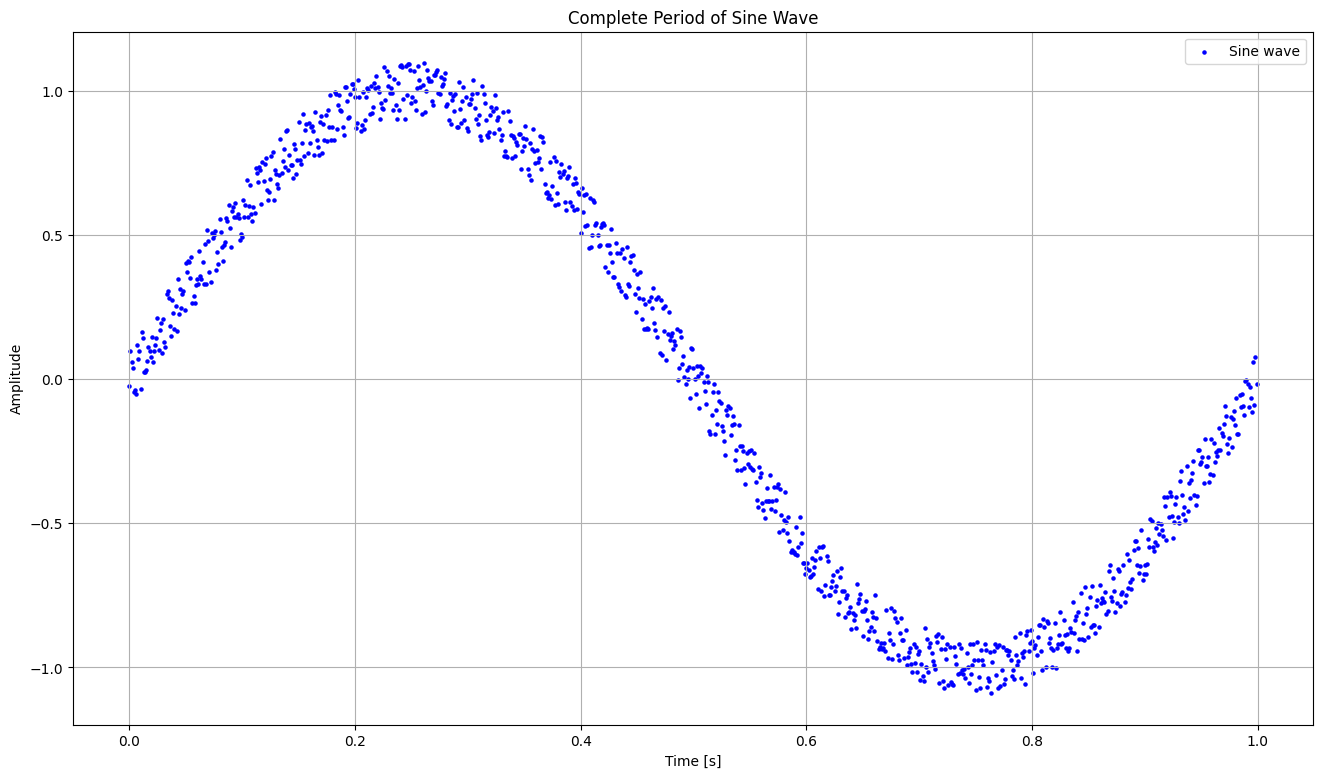

In [5838]:
# Plot the sine wave
plt.figure(figsize=(16, 9))
plt.scatter(feature_1, y, label='Sine wave', color='b', s=5)
plt.title('Complete Period of Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

In [5839]:
print(y)

[-2.50919762e-02  9.64260052e-02  5.89648282e-02  3.85801366e-02
 -4.36661765e-02 -3.73903369e-02 -5.06930949e-02  1.17203347e-01
  7.04673205e-02  9.81330500e-02 -3.30925816e-02  1.63041996e-01
  1.41815334e-01  2.40584337e-02  2.42161900e-02  3.07892153e-02
  6.12101634e-02  1.11562441e-01  9.92453886e-02  7.73429881e-02
  1.47703813e-01  5.94631312e-02  9.62192204e-02  1.17283151e-01
  1.41439586e-01  2.13469657e-01  1.02571922e-01  1.71680332e-01
  1.93505973e-01  9.04958462e-02  2.08890285e-01  1.27654293e-01
  1.12720299e-01  2.95639716e-01  3.05133517e-01  2.79822711e-01
  1.85193515e-01  1.49923849e-01  2.73345602e-01  2.30629730e-01
  1.73097534e-01  2.53806108e-01  1.67719211e-01  3.48766070e-01
  2.24707932e-01  3.11495563e-01  2.47361478e-01  2.95049771e-01
  3.06383637e-01  2.40006161e-01  4.02933920e-01  3.70013084e-01
  4.08843398e-01  4.05853500e-01  3.52399540e-01  4.23112767e-01
  2.62341424e-01  2.89730893e-01  2.65457336e-01  3.27341433e-01
  3.45860011e-01  3.28229

In [5840]:
print(feature_1)

[[0.   ]
 [0.001]
 [0.002]
 [0.003]
 [0.004]
 [0.005]
 [0.006]
 [0.007]
 [0.008]
 [0.009]
 [0.01 ]
 [0.011]
 [0.012]
 [0.013]
 [0.014]
 [0.015]
 [0.016]
 [0.017]
 [0.018]
 [0.019]
 [0.02 ]
 [0.021]
 [0.022]
 [0.023]
 [0.024]
 [0.025]
 [0.026]
 [0.027]
 [0.028]
 [0.029]
 [0.03 ]
 [0.031]
 [0.032]
 [0.033]
 [0.034]
 [0.035]
 [0.036]
 [0.037]
 [0.038]
 [0.039]
 [0.04 ]
 [0.041]
 [0.042]
 [0.043]
 [0.044]
 [0.045]
 [0.046]
 [0.047]
 [0.048]
 [0.049]
 [0.05 ]
 [0.051]
 [0.052]
 [0.053]
 [0.054]
 [0.055]
 [0.056]
 [0.057]
 [0.058]
 [0.059]
 [0.06 ]
 [0.061]
 [0.062]
 [0.063]
 [0.064]
 [0.065]
 [0.066]
 [0.067]
 [0.068]
 [0.069]
 [0.07 ]
 [0.071]
 [0.072]
 [0.073]
 [0.074]
 [0.075]
 [0.076]
 [0.077]
 [0.078]
 [0.079]
 [0.08 ]
 [0.081]
 [0.082]
 [0.083]
 [0.084]
 [0.085]
 [0.086]
 [0.087]
 [0.088]
 [0.089]
 [0.09 ]
 [0.091]
 [0.092]
 [0.093]
 [0.094]
 [0.095]
 [0.096]
 [0.097]
 [0.098]
 [0.099]
 [0.1  ]
 [0.101]
 [0.102]
 [0.103]
 [0.104]
 [0.105]
 [0.106]
 [0.107]
 [0.108]
 [0.109]
 [0.11 ]
 

In [5841]:
# SCALE THE DATA
from sklearn.preprocessing import StandardScaler

# Scale only features, the bias term must stay as 1.
scaler = StandardScaler()
feature_1 = scaler.fit_transform(feature_1)

X = np.c_[bias, feature_1]

In [5842]:
X

array([[ 1.        , -1.73031962],
       [ 1.        , -1.72685552],
       [ 1.        , -1.72339142],
       ...,
       [ 1.        ,  1.72339142],
       [ 1.        ,  1.72685552],
       [ 1.        ,  1.73031962]])

In [5843]:
# SPLIT THE DATA INTO TRAINING AND TEST SETS

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5844]:
from my_base_models import MyRegressionBase
from sklearn.preprocessing import PolynomialFeatures


# CREATE A POLYNOMIAL REGRESSION MODEL FROM SCRATCH

# Inherit from the Extension class to use its methods for visualization and evaluation
class MyPolynomialRegression(MyRegressionBase):
    """
    Polynomial regression model.
    
    It relies on the Linear Regression model. All the computations are the same as in basic Linear Regression. But in order to predict the non-linear relationship between the features and the target, we need to transform the features into polynomial features by raising them in the range of values till the max degree of polynomial. See the __polynomial_features method.
    """

    def __init__(self, degree=2, learning_rate=0.01, n_iterations=1000, regularization=None, alpha=0.0):
        super().__init__()
        self.degree = degree  # max degree of the polynomial
        self.learning_rate = learning_rate  # how much to update the parameters
        self.n_iterations = n_iterations  # how many times to update the parameters
        self.thetas = []  # parameter bias and weights
        self.losses = []  # to store the loss at each iteration

        self.regularization = regularization
        self.alpha = alpha

    def fit(self, X, y):
        """
        Fit the model to the data X and y. Meaning let the model learn the parameters.
        :param X: Features
        :param y: Labels
        :return: None
        """

        # transform the features into polynomial features
        X_polynomial = self.__polynomial_features(X, self.degree)

        n_samples, n_features = X_polynomial.shape

        # initialize the parameters with random values
        self.thetas = np.random.rand(n_features)
        print("Initial parameters: ", self.thetas)

        for _ in range(self.n_iterations):
            # prediction
            y_prediction = np.dot(X_polynomial, self.thetas)

            # compute the Mean Absolute Error (only for visualization, not used in the optimization process)
            loss = np.mean(np.abs(y - y_prediction))
            self.losses.append(loss)

            # compute gradient vector
            gradient_vector = 2 / n_samples * np.dot(X_polynomial.T, (y_prediction - y))

            if self.regularization == 'Ridge':
                # L2 regularization - Add alpha * theta to all features, except the bias
                gradient_vector = np.r_[gradient_vector[0], gradient_vector[1:]
                                                            + self.alpha * self.thetas[1:]]
            elif self.regularization == 'Lasso':
                # L1 regularization - Add alpha * sign(theta) to all features, except the bias
                gradient_vector = np.r_[gradient_vector[0], gradient_vector[1:]
                                                            + self.alpha * np.sign(self.thetas[1:])]
            elif self.regularization == 'ElasticNet':
                # Elastic Net regularization - Combine L1 and L2 regularization
                # Some implementations use different ratio between L1 and L2 regularization,
                # but here we use an equal combination, fifty-fifty.
                gradient_vector = np.r_[gradient_vector[0], gradient_vector[1:]
                                                            + self.alpha * self.thetas[1:]
                                                            + self.alpha * np.sign(self.thetas[1:])]

            # update the parameters
            self.thetas = self.thetas - self.learning_rate * gradient_vector

    def predict(self, X):
        # transform the features into polynomial features
        X_polynomial = self.__polynomial_features(X, self.degree)

        # make predictions
        return X_polynomial.dot(self.thetas)

    def __polynomial_features(self, X: np.array, degree: int) -> np.array:
        """
        Internal method to create polynomial features.
        With each iteration we add as a new columns the original features where each value of original
         feature is raised to the power of the iteration.

        :param X: Feature dataset
        :param degree: The maximum degree of the polynomial, meaning how many times we raise the original features.
        :return: Feature dataset with polynomial features. 
        """
        # Former code
        # X_polynomial = X
        # for i in range(2, degree + 1):
        #     X_polynomial = np.c_[X_polynomial, X ** i]

        # todo: The logic for computing polynomial features seems to be more complex than I thought. With the 
        #  commented code above, the model did fit something usefull, but it was not the perfect fit. You can 
        #  compare your solution with SKlearn PolynomialFeatures or try to search something on the internet.
        #  For now, I will keep the SKlearn PolynomialFeatures not to spend eternity on this.
        poly = PolynomialFeatures(degree=degree)
        X_polynomial = poly.fit_transform(X)

        # todo: looks like we need to scale the poly features, otherwise we might get infinities with high
        #  degrees. Also the model then performs better. 
        bias = X_polynomial[:, 0].reshape(-1, 1)
        poly_features = X_polynomial[:, 1:]
        scaler = StandardScaler()
        scaled = scaler.fit_transform(poly_features)

        X_polynomial_with_bias = np.c_[bias, scaled]
        return X_polynomial_with_bias



In [5845]:
# EXPLANATION HOW THE FEATURES ARE TRANSFORMED INTO POLYNOMIAL FEATURES
# todo: This is just very simple solution. In reality the formula seems to be more complicated and I have 
#  to update this. 
def __polynomial_features(X, degree):
    X_polynomial = X
    for i in range(2, degree + 1):
        X_polynomial = np.c_[X_polynomial, X ** i]
    return X_polynomial


X_demo = np.array(
    [[1, 1, 2],
     [1, 3, 4],
     [1, 5, 6]]
)

# Notice that each iteration in the function above adds new columns to the original dataset and at that iteration we raise the original features to the power of the iteration.
print("Original features:\n", X_demo)
print("Polynomial features 2nd degree:\n", __polynomial_features(X_demo, 2))
# print("Polynomial features 3rd degree:\n", __polynomial_features(X_demo, 3))

Original features:
 [[1 1 2]
 [1 3 4]
 [1 5 6]]
Polynomial features 2nd degree:
 [[ 1  1  2  1  1  4]
 [ 1  3  4  1  9 16]
 [ 1  5  6  1 25 36]]


In [5854]:
# Sklearn implementation includes the bias in other indexes (seems like) and also has combinations of features. 
# As I explained above, my implementation above is simplistic.
poly_SKLearn = PolynomialFeatures(degree=2)
X_polynomial_SKLearn = poly_SKLearn.fit_transform(X_demo)
print("Polynomial features 2nd degree SKLearn:")
print(X_polynomial_SKLearn)

Polynomial features 2nd degree SKLearn:
[[ 1.  1.  1.  2.  1.  1.  2.  1.  2.  4.]
 [ 1.  1.  3.  4.  1.  3.  4.  9. 12. 16.]
 [ 1.  1.  5.  6.  1.  5.  6. 25. 30. 36.]]


In [5847]:
# TRAIN THE MODEL
# Also contains examples of regularization. (References to other notebooks)
model = MyPolynomialRegression(degree=6,
                               learning_rate=0.03,
                               n_iterations=2000,
                               regularization='Ridge', # 'Ridge', 'Lasso', 'ElasticNet'
                               alpha=0.00)

model.fit(X_train, y_train)

Initial parameters:  [0.18513293 0.54190095 0.87294584 0.73222489 0.80656115 0.65878337
 0.69227656 0.84919565 0.24966801 0.48942496 0.22120944 0.98766801
 0.94405934 0.03942681 0.70557517 0.92524832 0.18057535 0.56794523
 0.9154883  0.03394598 0.69742027 0.29734901 0.9243962  0.97105825
 0.94426649 0.47421422 0.86204265 0.8445494 ]


In [5848]:
# SHOW BEST PARAMETERS
print(f"Best parameters: {model.show_parameters()}")

Best parameters: [-0.00220215  0.54190095 -0.18064319  0.73222489 -0.24702787  0.00485279
  0.69227656 -0.20439337 -0.40426257  0.27754906  0.22120944 -0.06592101
  0.29012877 -0.17244909  0.1854839   0.92524832 -0.87301368 -0.08598534
  0.7036124  -0.4861453  -0.24314273  0.29734901 -0.12919283  0.31712767
  0.73239059 -0.04587706 -0.07852034  0.22847406]


In [5849]:
# MAKE PREDICTIONS
y_pred = model.predict(X_test)

In [5850]:
# EVALUATE THE MODEL USING CUSTOM MAE FORMULA
mae = np.mean(np.abs(y_test - y_pred))
print(f"MAE: {mae}")

MAE: 0.055749475887720265


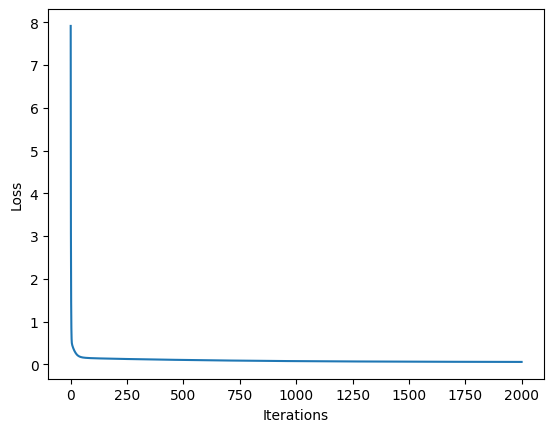

In [5851]:
# PLOT THE LOSS CURVE
model.show_loss_curve()

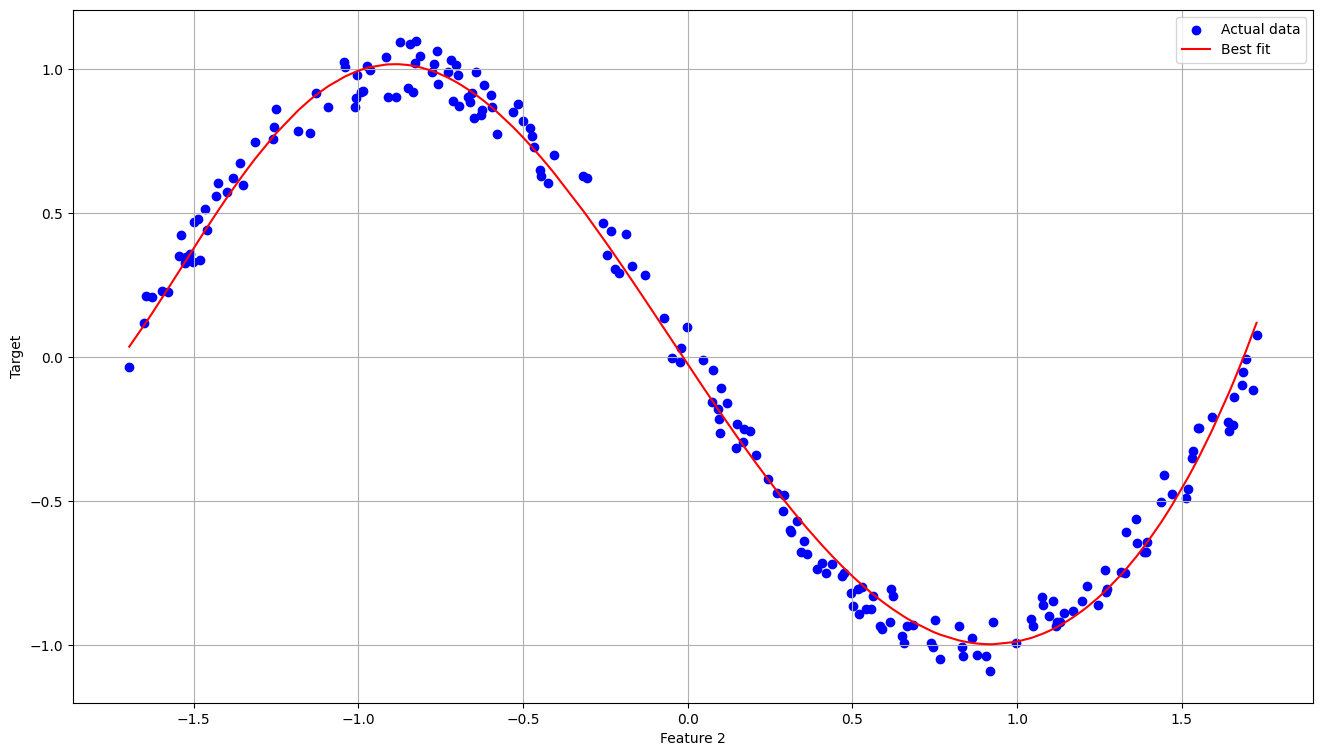

In [5852]:
# Sort the data based on the feature to maintain the relationship
sort_indices = np.argsort(X_test[:, 1])  # Sorting based on Feature 2
X_test_sorted = X_test[sort_indices, 1]
y_test_sorted = y_test[sort_indices]
y_pred_sorted = y_pred[sort_indices]

# Plot the data
fig = plt.figure(figsize=(16, 9))
plt.scatter(X_test_sorted, y_test_sorted, label="Actual data", color='b')
plt.plot(X_test_sorted, y_pred_sorted, label="Best fit", color='r')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.legend()
plt.grid()
plt.show()